## Import Modules


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


## Load and  Preparing The Dataset 


In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
data=fetch_california_housing()
dataset=pd.DataFrame(data.data,columns=data.feature_names)
dataset['Price']=data.target
dataset.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

In [4]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
# datatype info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Preparing The Dataset

In [7]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [8]:
#statistical info
dataset.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         Price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

The statistical summary revealed significant outliers in several features, with maximum values far exceeding the 75th percentile. For instance, the maximum number of average rooms was 141.91, while the 75th percentile was only 6.05, indicating extreme values likely representing errors or unique cases. Similarly, the average number of bedrooms and occupants per household had abnormally high values, contributing to high standard deviations and skewed distributions. These outliers distorted the dataset, potentially impacting the reliability of analyses and models built on this data.

In [10]:
clos = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup"]

from sklearn.ensemble import IsolationForest
clf = IsolationForest(contamination=0.05) 
clf.fit(dataset[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']])
y_pred = clf.predict(dataset[['MedInc', 'HouseAge','AveRooms','AveBedrms','Population','AveOccup']])

df_cleaned = dataset[y_pred == 1]

In [11]:
df_cleaned.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  19608.000000  19608.000000  19608.000000  19608.000000  19608.000000   
mean       3.823145     28.848888      5.253333      1.061147   1368.119135   
std        1.743882     12.296940      1.157912      0.103081    849.515754   
min        0.499900      1.000000      0.888889      0.500000      5.000000   
25%        2.574300     19.000000      4.441027      1.005202    804.000000   
50%        3.531300     29.000000      5.202014      1.047152   1171.000000   
75%        4.714300     37.000000      5.980044      1.095365   1703.000000   
max       15.000100     52.000000     10.386667      2.004415   6640.000000   

           AveOccup      Latitude     Longitude         Price  
count  19608.000000  19608.000000  19608.000000  19608.000000  
mean       2.896725     35.629982   -119.586397      2.056538  
std        0.699355      2.133045      1.999718      1.133522  
min        1.169329     32.540000   -124.350000      0.149990  
25%        2.431287     33.930000   -121.810000      1.194750  
50%        2.813443     34.260000   -118.500000      1.799000  
75%        3.265946     37.710000   -118.020000      2.637000  
max        6.823920     41.950000   -114.550000      5.000010

C:\Users\blueNoteBook\AppData\Local\Temp\ipykernel_700\2841578546.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y="Price", data=df_cleaned, palette='coolwarm', s=20, alpha=0.7)
C:\Users\blueNoteBook\AppData\Local\Temp\ipykernel_700\2841578546.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y="Price", data=df_cleaned, palette='coolwarm', s=20, alpha=0.7)
C:\Users\blueNoteBook\AppData\Local\Temp\ipykernel_700\2841578546.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y="Price", data=df_cleaned, palette='coolwarm', s=20, alpha=0.7)
C:\Users\blueNoteBook\AppData\Local\Temp\ipykernel_700\2841578546.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y="Price", data=df_cleaned, palette='coolwarm', s=20, alpha=0.7)
C:\Users\blueNoteBook\AppDat

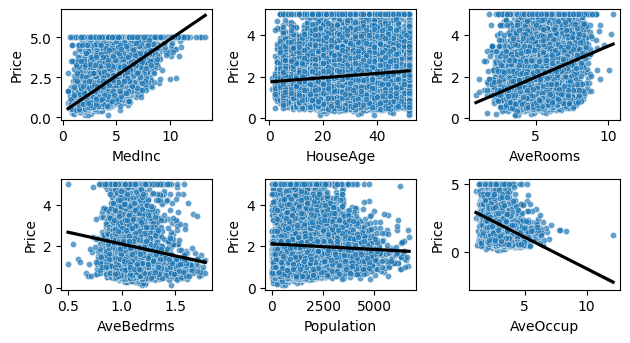

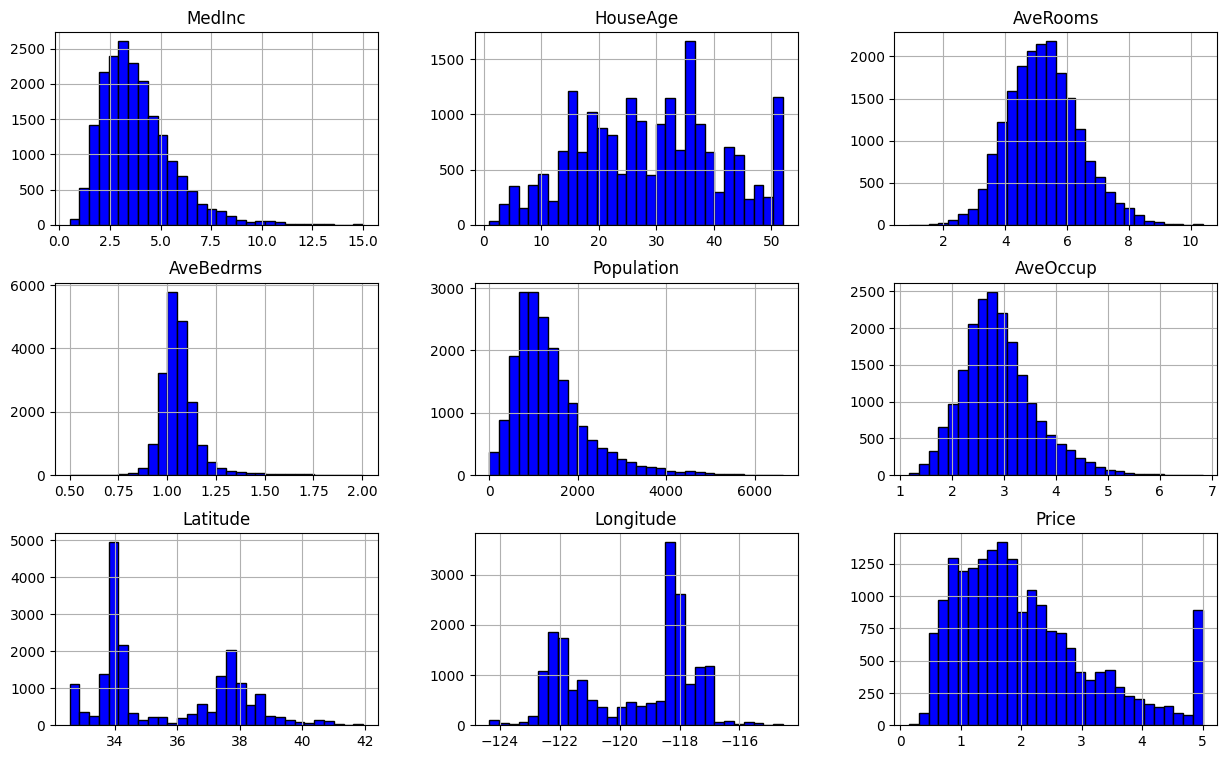

In [12]:
df_cleaned.hist(bins=30, edgecolor="black", figsize=(15,9),color='blue');plt.show()

## Analyzing The Correlated Features

In [13]:
df_cleaned.corr()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.138522  0.680793  -0.213480   -0.013336 -0.076846   
HouseAge   -0.138522  1.000000 -0.213954  -0.116686   -0.301628 -0.005878   
AveRooms    0.680793 -0.213954  1.000000   0.164055   -0.078132 -0.023757   
AveBedrms  -0.213480 -0.116686  0.164055   1.000000   -0.020593 -0.116938   
Population -0.013336 -0.301628 -0.078132  -0.020593    1.000000  0.193861   
AveOccup   -0.076846 -0.005878 -0.023757  -0.116938    0.193861  1.000000   
Latitude   -0.082835  0.007866  0.128465   0.075547   -0.113332 -0.173894   
Longitude  -0.014820 -0.098164 -0.089084  -0.004831    0.106946  0.189341   
Price       0.685617  0.106737  0.315285  -0.102755   -0.040995 -0.298465   

            Latitude  Longitude     Price  
MedInc     -0.082835  -0.014820  0.685617  
HouseAge    0.007866  -0.098164  0.106737  
AveRooms    0.128465  -0.089084  0.315285  
AveBedrms   0.075547  -0.004831 -0.102755  
Population -0.113332   0.106946 -0.040995  
AveOccup   -0.173894   0.189341 -0.298465  
Latitude    1.000000  -0.929005 -0.146290  
Longitude  -0.929005   1.000000 -0.043440  
Price      -0.146290  -0.043440  1.000000

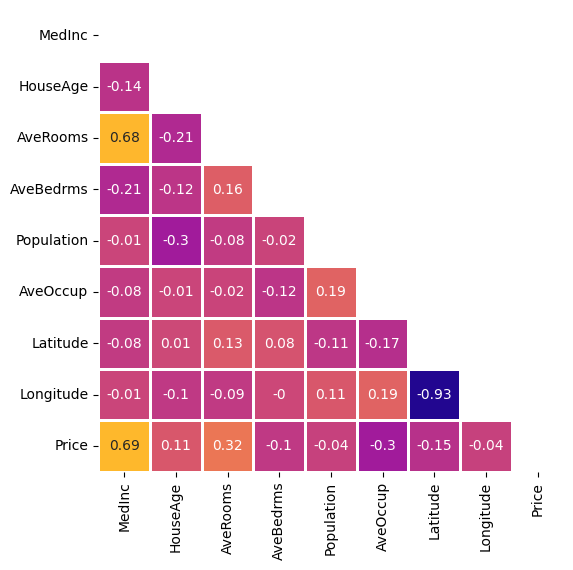

In [14]:
''' Function to plot correlation of features '''
def corrMat(df,id=False):
    
    corr_mat = df.select_dtypes(include=[np.number]).corr().round(2)
    f, ax = plt.subplots(figsize=(6,6))
    mask = np.zeros_like(corr_mat,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0, 
                cmap='plasma',square=False,lw=2,annot=True,cbar=False);plt.show()  


corrMat(df_cleaned)

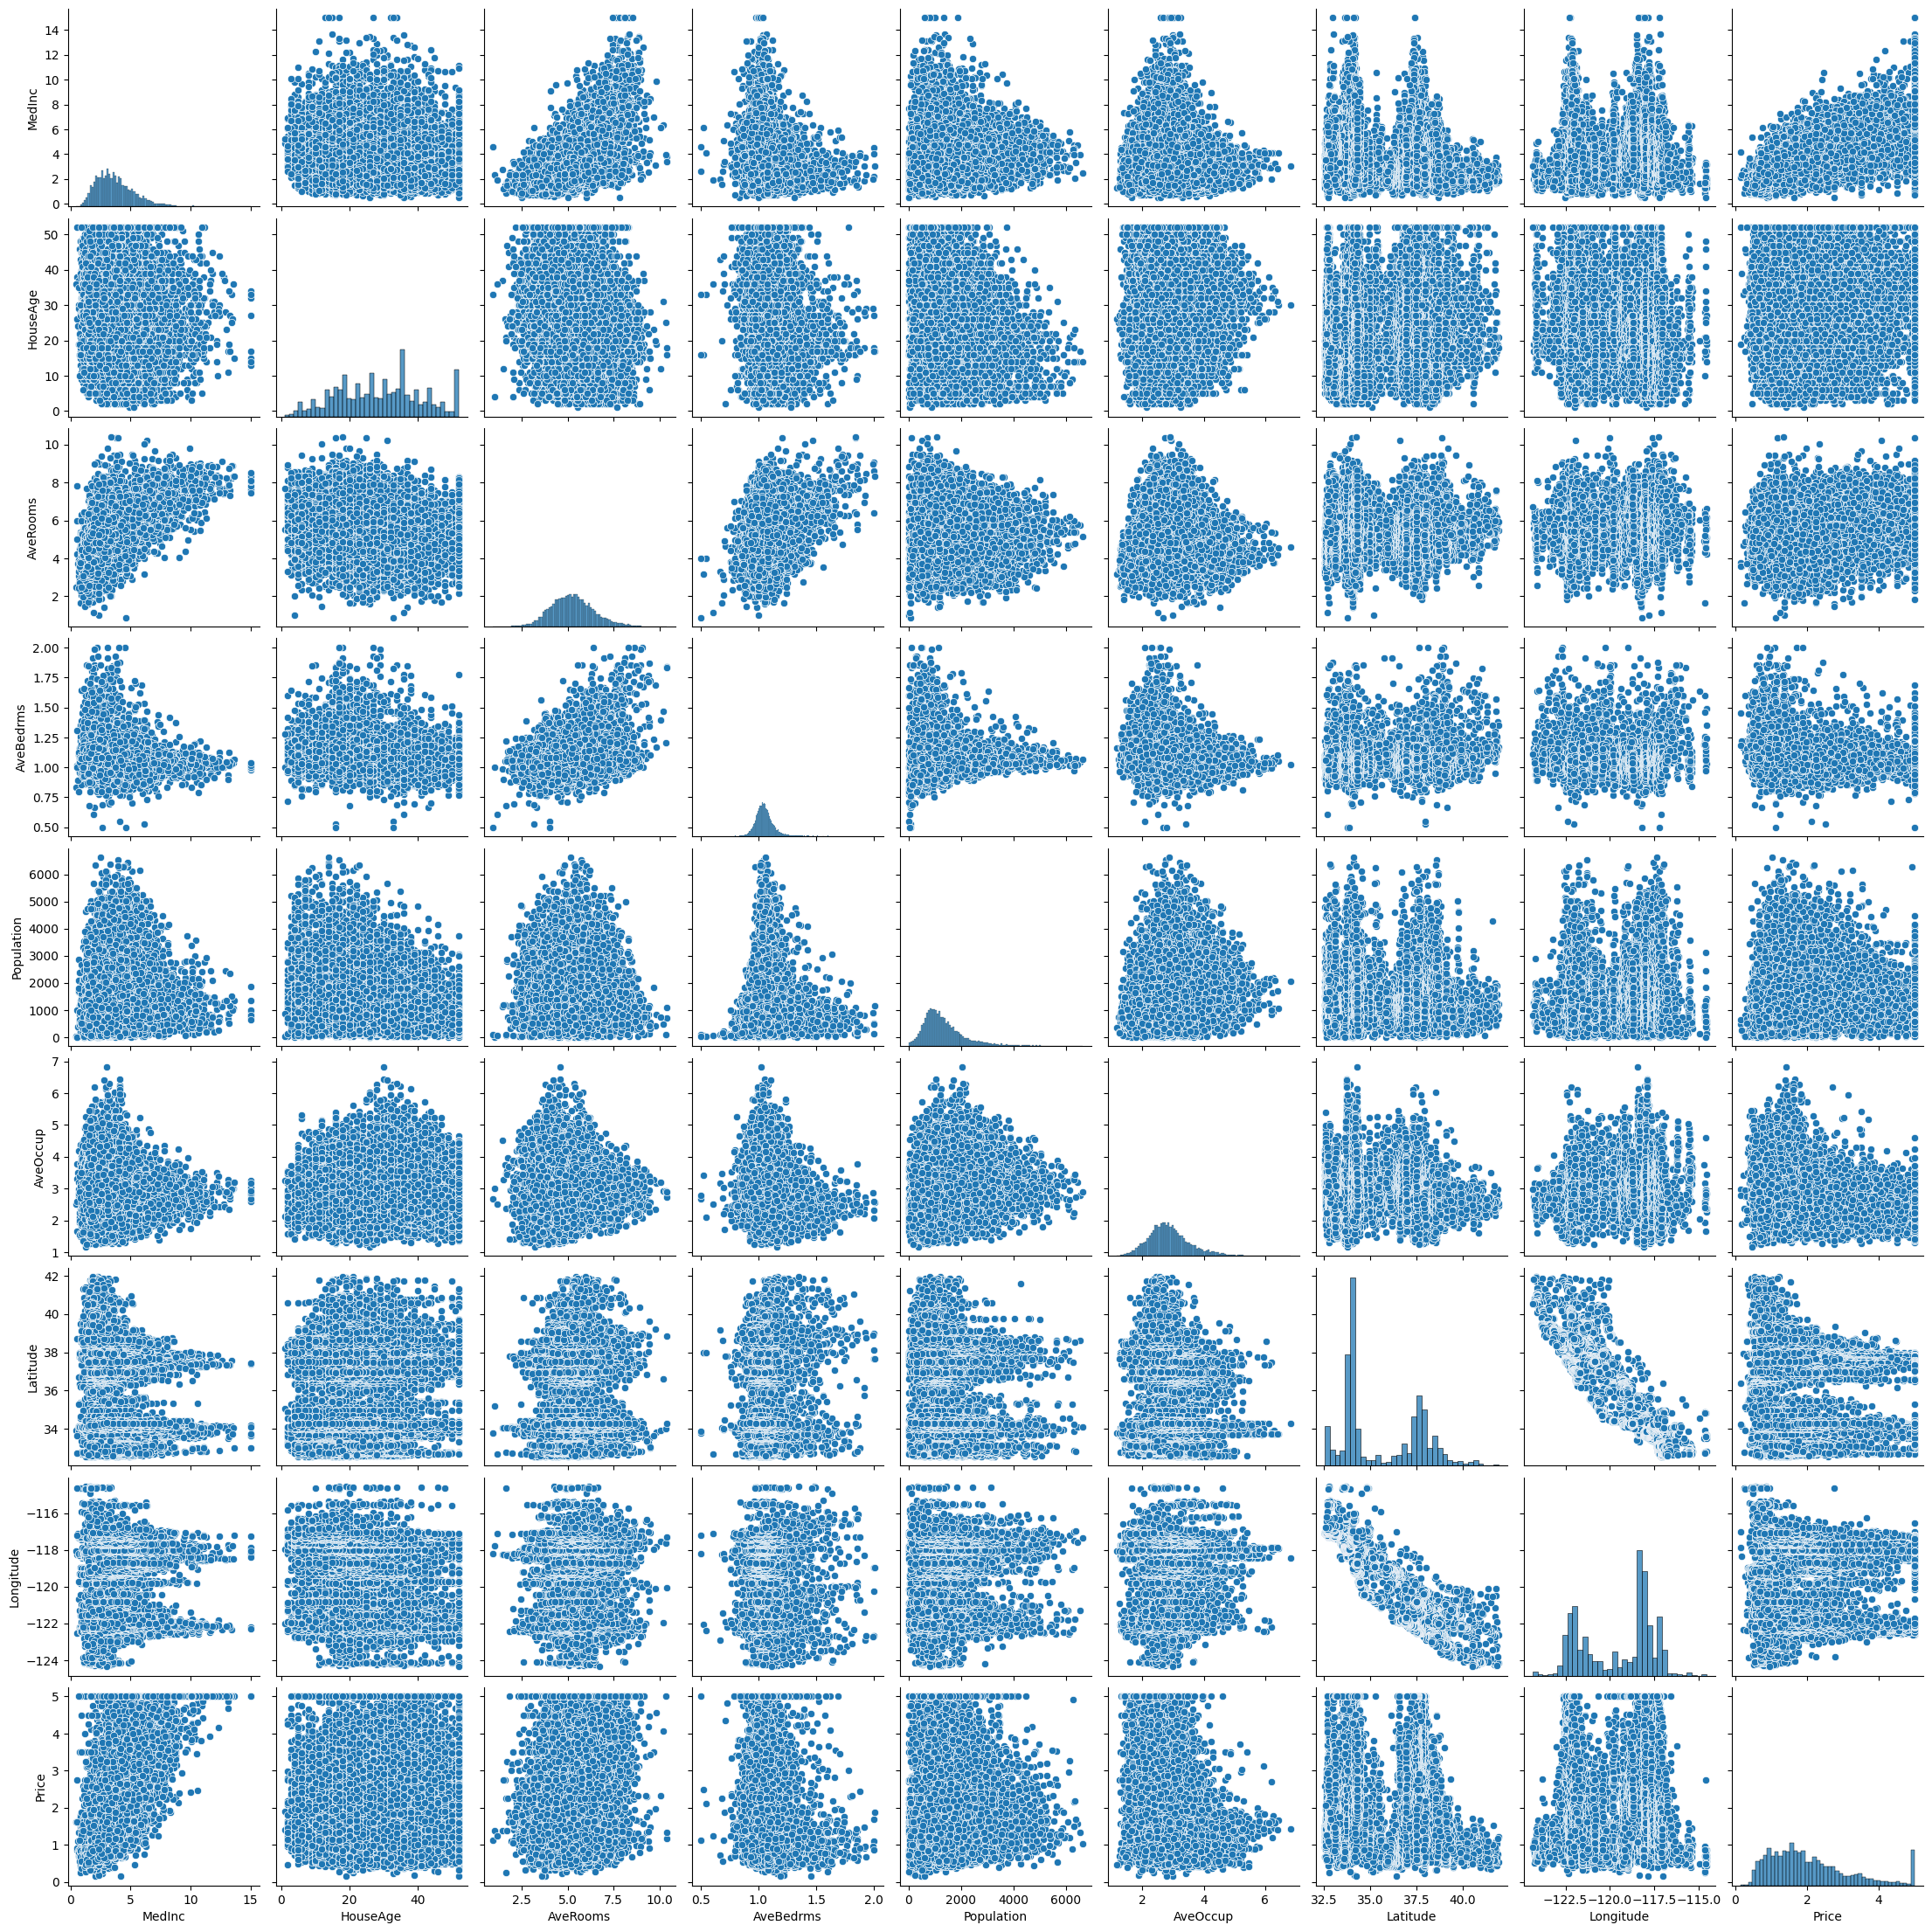

In [15]:
sns.pairplot(df_cleaned)

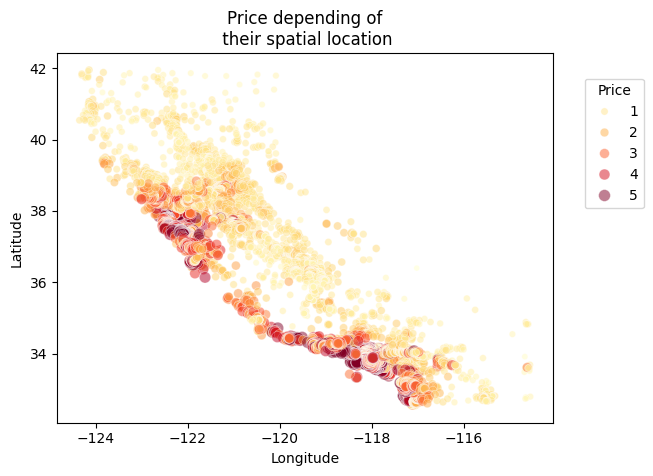

In [16]:
sns.scatterplot(
    data=df_cleaned,
    x="Longitude",
    y="Latitude",
    size="Price",
    hue="Price",
    palette="YlOrRd",
    alpha=0.5
)
plt.legend(title="Price", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Price depending of\n their spatial location")

The analysis of the California housing dataset highlights that median income is the most influential factor in determining housing prices, with higher income levels strongly correlating with higher property values. Geographic location also plays a critical role, as properties situated further west (closer to the coast)  tend to be more expensive.Additionally, homes with more rooms are positively associated with higher prices, reflecting the value of larger living spaces. In contrast, a higher proportion of bedrooms to total rooms negatively impacts prices, suggesting that inefficient room configurations may reduce desirability. Interestingly, population density and related metrics show little to no significant impact on housing prices. Overall, the findings emphasize that income levels and geographic desirability are the key drivers shaping California’s housing market.

## Coefficient Analysis of Each Feature in Housing Price Prediction

In [17]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df_cleaned.drop('Price', axis=1)
y = df_cleaned['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_with_const = sm.add_constant(X_train_scaled)

model = sm.OLS(y_train, X_train_scaled_with_const)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     3573.
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        13:52:12   Log-Likelihood:                -13404.
No. Observations:               13725   AIC:                         2.683e+04
Df Residuals:                   13716   BIC:                         2.689e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0560      0.005    374.741      0.0

OLS regression model reveals that median income is the most significant predictor of housing prices, with a strong positive effect (coefficient = 0.8308). This indicates that wealthier areas tend to have higher property values. Geographic factors, such as longitude (-0.8758) and latitude (-0.2722), also play a critical role, with properties located further west (closer to the coast) and north being more valuable. Additionally, homes with more rooms have a positive impact on price (0.1574), while an inefficient bedroom-to-room ratio negatively affects value (-0.1612). Factors such as population density and house age have smaller but statistically significant effects. Overall, the model explains about 67.6% of the variance in housing prices (R² = 0.676), emphasizing that income levels and location are the primary drivers of property values in California

## Linear Regression


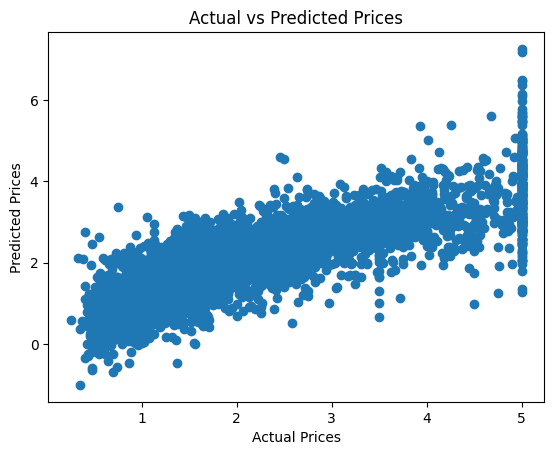

In [18]:
regression = LinearRegression()
regression.fit(X_train_scaled, y_train)  
reg_pred = regression.predict(X_test_scaled)

# Plot the predicted vs actual prices
plt.scatter(y_test, reg_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

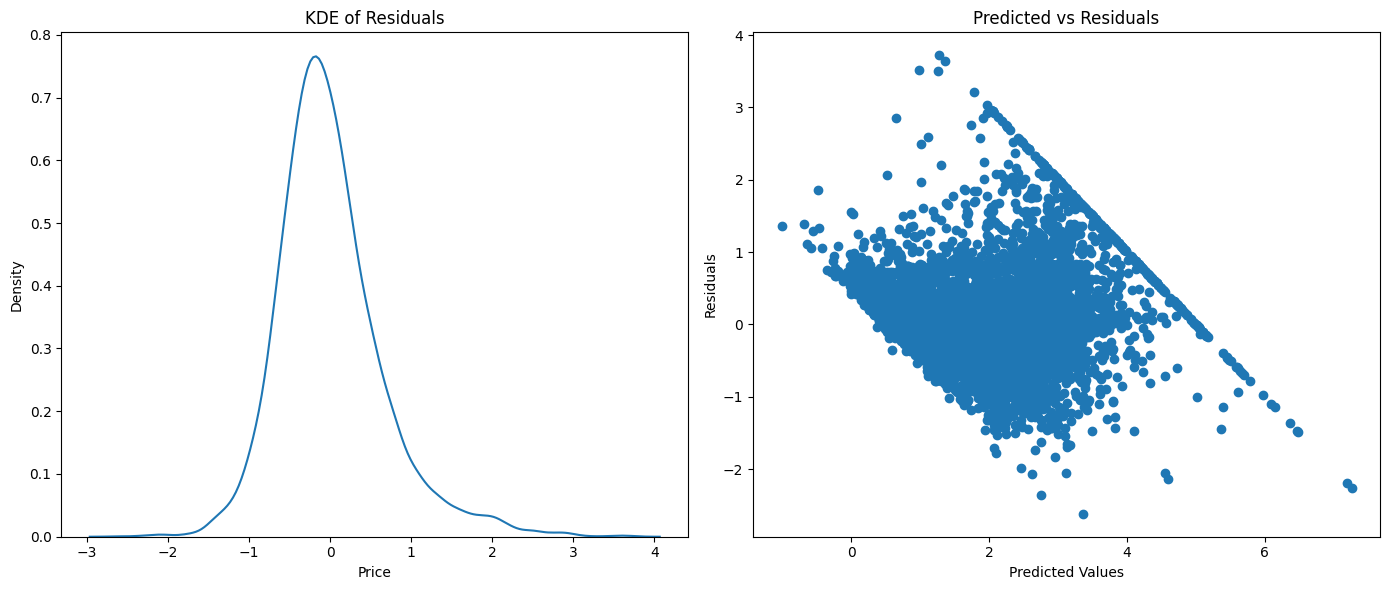

In [19]:
lr_residuals=y_test-reg_pred
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.kdeplot(lr_residuals, ax=ax[0])
ax[0].set_title('KDE of Residuals')

ax[1].scatter(reg_pred, lr_residuals)
ax[1].set_title('Predicted vs Residuals')
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

In [20]:
from sklearn.metrics import r2_score
results = []
print('LR MAE:',mean_absolute_error(y_test,reg_pred))
print('LR MSE:',mean_squared_error(y_test,reg_pred))
print('LR RMSE:',np.sqrt(mean_squared_error(y_test,reg_pred)))
score=r2_score(y_test,reg_pred)
AdjustedR2=1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
print('LR R2: ',score)
print('LR Adjusted R2: ',AdjustedR2)
results.append({"Model":'LinearRegression', "MAE": mean_absolute_error(y_test,reg_pred), "MSE": mean_squared_error(y_test,reg_pred), "RMSE": np.sqrt(mean_squared_error(y_test,reg_pred)), "R2":score, "Adjusted R2": AdjustedR2})

LR MAE: 0.48390503121746375
LR MSE: 0.43141699935709427
LR RMSE: 0.6568234156583445
LR R2:  0.671017729758386
LR Adjusted R2:  0.6705696776368448


## RandomForestRegressor

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

rf_pred = rf_model.predict(X_test_scaled)
print("Random Forest MAE:", mean_absolute_error(y_test, rf_pred))
print("Random Forest MSE:", mean_squared_error(y_test, rf_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
rf_score=r2_score(y_test,rf_pred)
rf_AdjustedR2=1 - (1-rf_score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
print('R2: ',rf_score)
print('Adjusted R2: ',rf_AdjustedR2)
results.append({"Model": 'RandomForest', "MAE": mean_absolute_error(y_test,rf_pred), "MSE": mean_squared_error(y_test,rf_pred), "RMSE": np.sqrt(mean_squared_error(y_test,rf_pred)), "R2":rf_score, "Adjusted R2": rf_AdjustedR2})

Random Forest MAE: 0.32606107897331305
Random Forest MSE: 0.25663901083060875
Random Forest RMSE: 0.5065955100774273
R2:  0.804296806705729
Adjusted R2:  0.804030271883401


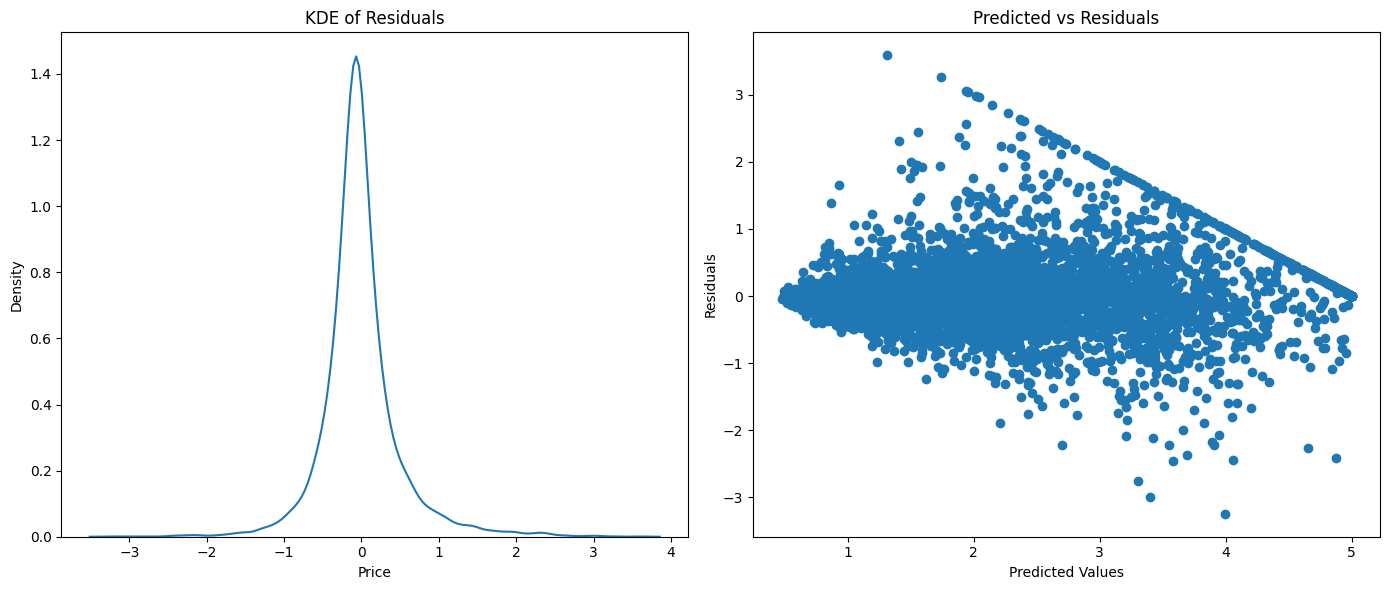

In [22]:
rf_residuals=y_test-rf_pred
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.kdeplot(rf_residuals, ax=ax[0])
ax[0].set_title('KDE of Residuals')

ax[1].scatter(rf_pred, rf_residuals)
ax[1].set_title('Predicted vs Residuals')
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

## GradientBoostingRegressor

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

gb_pred = gb_model.predict(X_test_scaled)
print("Gradient Boosting MAE:", mean_absolute_error(y_test, gb_pred))
print("Gradient Boosting MSE:", mean_squared_error(y_test, gb_pred))
print("Gradient Boosting RMSE:", np.sqrt(mean_squared_error(y_test, gb_pred)))
gb_score=r2_score(y_test,gb_pred)
gb_AdjustedR2=1 - (1-gb_score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
print('R2: ',gb_score)
print('Adjusted R2: ',gb_AdjustedR2)
results.append({"Model": 'XGBoost', "MAE": mean_absolute_error(y_test,gb_pred), "MSE": mean_squared_error(y_test,gb_pred), "RMSE": np.sqrt(mean_squared_error(y_test,gb_pred)), "R2":gb_score, "Adjusted R2": gb_AdjustedR2})

Gradient Boosting MAE: 0.3688656630900789
Gradient Boosting MSE: 0.2864164316433229
Gradient Boosting RMSE: 0.5351788781737588
R2:  0.7815896729685208
Adjusted R2:  0.7812922125299352


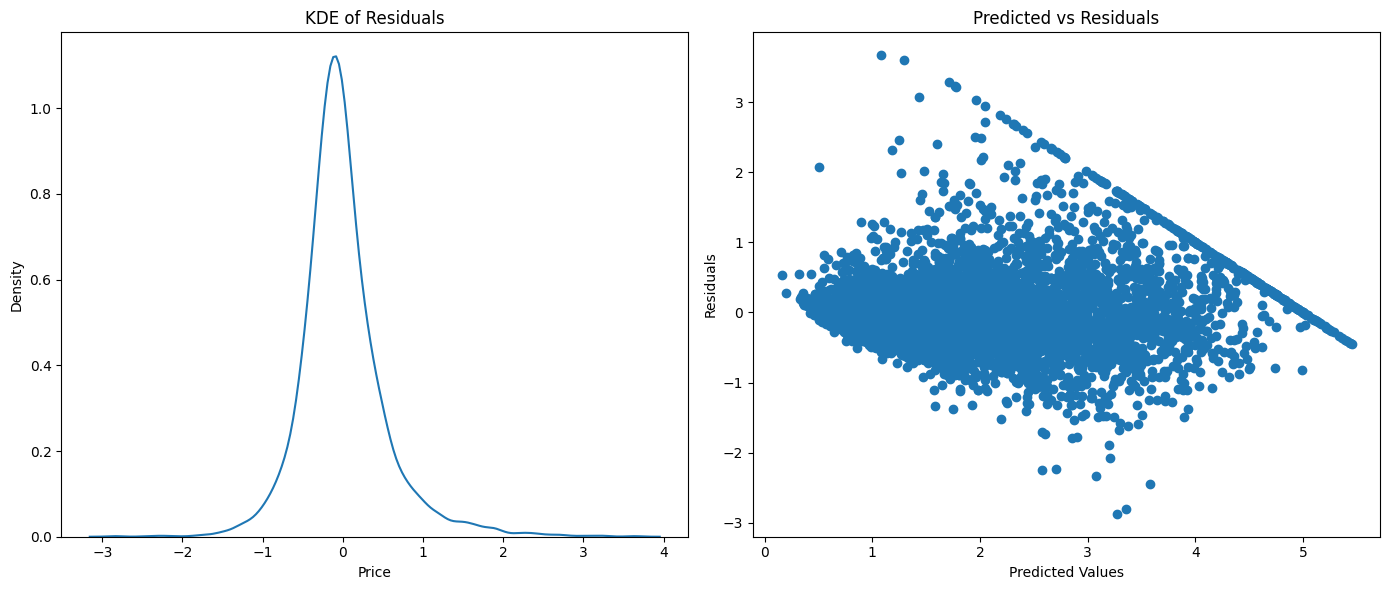

In [24]:
gb_residuals=y_test-gb_pred
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.kdeplot(gb_residuals, ax=ax[0])
ax[0].set_title('KDE of Residuals')

ax[1].scatter(gb_pred, gb_residuals)
ax[1].set_title('Predicted vs Residuals')
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

## SVR

In [25]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

svr_pred = svr_model.predict(X_test_scaled)
print("SVR MAE:", mean_absolute_error(y_test, svr_pred))
print("SVR MSE:", mean_squared_error(y_test, svr_pred))
print("SVR RMSE:", np.sqrt(mean_squared_error(y_test, svr_pred)))
SVR_score=r2_score(y_test,svr_pred)
SVR_AdjustedR2=1 - (1-SVR_score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
print('SVR R2: ',SVR_score)
print('SVR Adjusted R2: ',SVR_AdjustedR2)
results.append({"Model": 'SVR', "MAE": mean_absolute_error(y_test,svr_pred), "MSE": mean_squared_error(y_test,svr_pred), "RMSE": np.sqrt(mean_squared_error(y_test,svr_pred)), "R2":SVR_score, "Adjusted R2": SVR_AdjustedR2})

SVR MAE: 0.36608037197113524
SVR MSE: 0.29830678175191405
SVR RMSE: 0.5461746806214236
SVR R2:  0.7725225421449295
SVR Adjusted R2:  0.7722127328730807


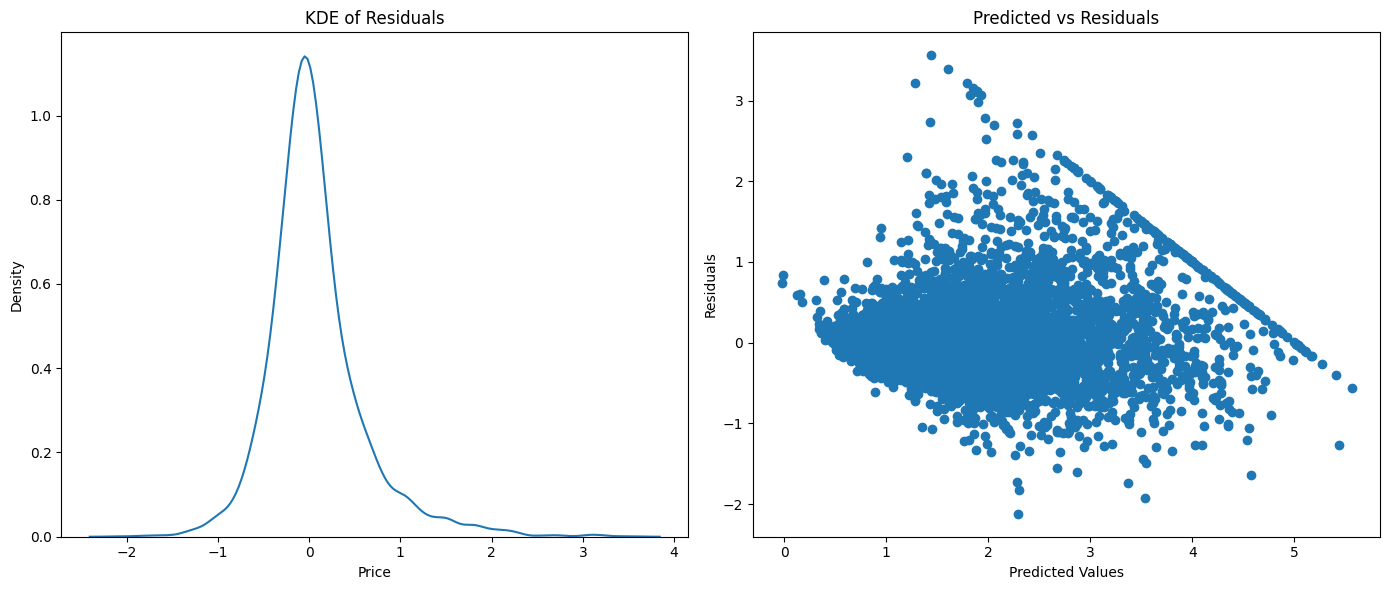

In [97]:
SVR_residuals=y_test-svr_pred
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.kdeplot(SVR_residuals, ax=ax[0])
ax[0].set_title('KDE of Residuals')

ax[1].scatter(svr_pred, SVR_residuals)
ax[1].set_title('Predicted vs Residuals')
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

In [26]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

NN_pred = mlp_model.predict(X_test_scaled)

print("SVR MAE:", mean_absolute_error(y_test, NN_pred))
print("SVR MSE:", mean_squared_error(y_test, NN_pred))
print("SVR RMSE:", np.sqrt(mean_squared_error(y_test, NN_pred)))
NN_score=r2_score(y_test,NN_pred)
NN_AdjustedR2=1 - (1-NN_score)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
print('SVR R2: ',NN_score)
print('SVR Adjusted R2: ',NN_AdjustedR2)
results.append({"Model": 'MLPRegressor', "MAE": mean_absolute_error(y_test,NN_pred), "MSE": mean_squared_error(y_test,NN_pred), "RMSE": np.sqrt(mean_squared_error(y_test,NN_pred)), "R2":NN_score, "Adjusted R2": NN_AdjustedR2})

SVR MAE: 0.3562448134293477
SVR MSE: 0.27196342492952136
SVR RMSE: 0.5215011264892161
SVR R2:  0.7926109886969446
SVR Adjusted R2:  0.7923285385623813


In [27]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(

    by=["R2", "Adjusted R2", "MAE", "MSE", "RMSE"], ascending=[False, False, True, True, True]
)
print(results_df)

              Model       MAE       MSE      RMSE        R2  Adjusted R2
1      RandomForest  0.326061  0.256639  0.506596  0.804297     0.804030
4      MLPRegressor  0.356245  0.271963  0.521501  0.792611     0.792329
2           XGBoost  0.368866  0.286416  0.535179  0.781590     0.781292
3               SVR  0.366080  0.298307  0.546175  0.772523     0.772213
0  LinearRegression  0.483905  0.431417  0.656823  0.671018     0.670570


The analysis of the regression models reveals that the RandomForest model outperforms the others, achieving the lowest Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE), along with the highest R-squared (R²) value. This indicates it effectively captures the variance in the data. The MLPRegressor follows closely, while XGBoost and SVR show moderate performance. In contrast, Linear Regression is the least effective model, with higher error metrics and lower explanatory power. Overall, for high accuracy in predictions, RandomForest is the recommended choice